In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [2]:
data = pd.read_csv('C:/Users/pc/Desktop/FAKE NEWS DATASET.csv')

In [3]:
#displauying first 10 rows
data.head(10)

,Author,Published,Title,Text,Language,Site_url,Main_img_url,Type,Label,Title_without_stopwords,Text_without_stopwords,HasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0
5,Barracuda Brigade,2016-11-02T16:31:28.550+02:00,hillary goes absolutely berserk on protester a...,print hillary goes absolutely berserk she expl...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/11/Fu...,bias,Real,hillary goes absolutely berserk protester rall...,print hillary goes absolutely berserk explodes...,1.0
6,Fed Up,2016-11-04T19:40:00.000+02:00,breaking nypd ready to make arrests in weiner ...,breaking nypd ready to make arrests in weiner ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,breaking nypd ready make arrests weiner casehi...,breaking nypd ready make arrests weiner casehi...,1.0
7,Fed Up,2016-11-05T01:19:00.000+02:00,wow whistleblower tells chilling story of mass...,breaking nypd ready to make arrests in weiner ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,wow whistleblower tells chilling story massive...,breaking nypd ready make arrests weiner casehi...,1.0
8,Fed Up,2016-11-06T23:54:00.000+02:00,breaking clinton clearedwas this a coordinated...,limbaugh said that the revelations in the wiki...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,breaking clinton clearedwas coordinated last m...,limbaugh said revelations wikileaks material s...,1.0
9,Fed Up,2016-11-07T02:43:00.000+02:00,evil hillary supporters yell fck trumpburn tru...,email \nthese people are sick and evil they wi...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,evil hillary supporters yell fck trumpburn tru...,email people sick evil stop nothing get way la...,1.0


In [4]:
#displaying last 10 rows
data.tail(10)

,Author,Published,Title,Text,Language,Site_url,Main_img_url,Type,Label,Title_without_stopwords,Text_without_stopwords,HasImage
2110,Henry Wolff,2016-10-28T06:29:00.000+03:00,dont root root root for the racist redface tea...,japans population declines in for first time ...,english,amren.com,http://www.amren.com/wp-content/uploads/2014/0...,bs,Fake,dont root root root racist redface team cleveland,japans population declines first time since ja...,1.0
2111,Henry Wolff,2016-10-28T06:29:00.000+03:00,students to protest mikado for lack of engagem...,chinese immigrants demand protection from pari...,english,amren.com,http://www.amren.com/wp-content/uploads/2014/0...,bs,Fake,students protest mikado lack engagement contro...,chinese immigrants demand protection paris mug...,1.0
2112,Henry Wolff,2016-10-28T06:29:00.000+03:00,japans population declines in for first time ...,facebook lets advertisers exclude users by rac...,english,amren.com,http://www.amren.com/wp-content/uploads/2014/0...,bs,Fake,japans population declines first time since,facebook lets advertisers exclude users race j...,1.0
2113,Henry Wolff,2016-10-28T06:29:00.000+03:00,chinese immigrants demand protection from pari...,posted on october media selfdestruct over tr...,english,amren.com,http://www.amren.com/wp-content/uploads/2014/0...,bs,Fake,chinese immigrants demand protection paris mug...,posted october media selfdestruct trump jared ...,1.0
2114,No Author,2016-10-28T20:05:00.000+03:00,facebook lets advertisers exclude users by race,posted on october trump reaches out to black...,english,amren.com,http://www.amren.com/wp-content/uploads/2014/0...,bs,Fake,facebook lets advertisers exclude users race,posted october trump reaches blacks blacks rio...,1.0
2115,Jared Taylor,2016-10-29T04:38:59.696+03:00,media selfdestruct over trump,some cities want their noncitizen immigrants t...,english,amren.com,http://www.amren.com/wp-content/uploads/2014/0...,bs,Fake,media selfdestruct trump,cities want noncitizen immigrants vote carolin...,1.0
2116,Jared Taylor,2016-10-29T04:39:00.164+03:00,trump reaches out to blacks blacks riot in phi...,illinois senator draws fire for racially charg...,english,amren.com,http://www.amren.com/wp-content/uploads/2014/0...,bs,Fake,trump reaches blacks blacks riot philadelphia,illinois senator draws fire racially charged a...,1.0
2117,Henry Wolff,2016-10-29T04:39:02.722+03:00,some cities want their noncitizen immigrants t...,go back to where you claim home kansas lawmake...,english,amren.com,http://www.amren.com/wp-content/uploads/2014/0...,bs,Fake,cities want noncitizen immigrants vote,go back claim home kansas lawmaker tells prote...,1.0
2118,Henry Wolff,2016-10-29T04:39:05.622+03:00,illinois senator draws fire for racially charg...,rancher yearns for trump wall on usmexico bord...,english,amren.com,http://www.amren.com/wp-content/uploads/2014/0...,bs,Fake,illinois senator draws fire racially charged a...,rancher yearns trump wall usmexico border afp ...,1.0
2119,Henry Wolff,2016-10-29T04:39:06.431+03:00,go back to where you claim home kansas lawmake...,ers fans care more about victories than kaeper...,english,amren.com,http://www.amren.com/wp-content/uploads/2014/0...,bs,Fake,go back claim home kansas lawmaker tells prote...,ers fans care victories kaepernick elliott alm...,1.0


In [5]:
#displaying number of rows and columns
data.shape

(2120, 12)

In [6]:
#i will see the uniqueness of the dataset
data.nunique()

Author                      490
Published                  1982
Title                      1762
Text                       1918
Language                      6
Site_url                     69
Main_img_url               1228
Type                          9
Label                         3
Title_without_stopwords    1757
Text_without_stopwords     1912
HasImage                      2
dtype: int64

In [7]:
#i will find the datatypes 
data.dtypes

Author                      object
Published                   object
Title                       object
Text                        object
Language                    object
Site_url                    object
Main_img_url                object
Type                        object
Label                       object
Title_without_stopwords     object
Text_without_stopwords      object
HasImage                   float64
dtype: object

In [8]:
#missing value analysis
data.isnull().sum()

Author                      1
Published                   0
Title                       0
Text                       45
Language                    1
Site_url                    1
Main_img_url                1
Type                        1
Label                       1
Title_without_stopwords     3
Text_without_stopwords     51
HasImage                    2
dtype: int64

In [9]:
#filling of missing value and dropping of few attributes

data['Author'] = data['Author'].bfill()
data['Title'] = data['Title'].bfill()
data['Text'] = data['Text'].bfill()
data['Language'] = data['Language'].bfill()
data['Site_url'] = data['Site_url'].bfill()
data['Type'] = data['Type'].bfill()
data['HasImage'] = data['HasImage'].bfill()
data['Label'] = data['Label'].bfill()

#dropping of remaining
data.drop(['Published'],axis=1,inplace=True)
data.drop(['Main_img_url'],axis=1,inplace=True)
data.drop(['Title_without_stopwords'],axis=1,inplace=True)
data.drop(['Text_without_stopwords'],axis=1,inplace=True)

In [10]:
data.isnull().sum()

Author      0
Title       0
Text        0
Language    0
Site_url    0
Type        0
Label       0
HasImage    0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Author    2120 non-null   object 
 1   Title     2120 non-null   object 
 2   Text      2120 non-null   object 
 3   Language  2120 non-null   object 
 4   Site_url  2120 non-null   object 
 5   Type      2120 non-null   object 
 6   Label     2120 non-null   object 
 7   HasImage  2120 non-null   float64
dtypes: float64(1), object(7)
memory usage: 132.6+ KB


In [12]:
#i will get the valuecounts for each attribute as this will be easier for missing value analysis
print('==============Value counts for author==============\n',data['Author'].value_counts())
print('==============Value countsfor Title==============\n',data['Title'].value_counts())
print('==============Value counts for Text==============\n',data['Text'].value_counts())
print('==============Value counts for Language==============\n',data['Language'].value_counts())
print('==============Value counts for Site_urlMain_img_url ==============\n',data['Site_url'].value_counts())
print('==============Value counts for Type==============\n',data['Type'].value_counts())
print('==============Value counts for Label==============\n',data['Label'].value_counts())
print('==============Value counts for HasImage==============\n',data['HasImage'].value_counts())

==============Value counts for author==============
 Author
No Author                              507
EdJenner                                82
noreply@blogger.com (Der Postillon)     72
Activist Post                           60
-NO AUTHOR-                             58
                                      ... 
adobochron                               1
johnrussell                              1
Rebecca Bennett                          1
samar pahwa                              1
Allen Mendenhall                         1
Name: count, Length: 490, dtype: int64
==============Value countsfor Title==============
 Title
no title                                                                                           188
newsticker                                                                                          11
our new country women and minorities hit hardest                                                     3
watch hillary aide rushes to her side to help her climb one st

In [13]:
# import pandas as pd

# # Categorical columns for one-hot encoding
# categorical_columns = ['Author', 'Language', 'Type']

# # Perform one-hot encoding
# df_encoded = pd.get_dummies(data, columns=categorical_columns,dtype=int)
# print(df_encoded)

In [14]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Assuming 'df' is your DataFrame
# # Replace 'Title' and 'Text' with the actual column names in your dataset

# # Create a TF-IDF vectorizer for the 'Title' column
# tfidf_vectorizer_title = TfidfVectorizer(max_features=500, stop_words='english')
# tfidf_title = tfidf_vectorizer_title.fit_transform(data['Title'])

# # Create a TF-IDF vectorizer for the 'Text' column
# tfidf_vectorizer_text = TfidfVectorizer(max_features=1000, stop_words='english')
# tfidf_text = tfidf_vectorizer_text.fit_transform(data['Text'])

# # Convert the TF-IDF matrices into DataFrames
# df_tfidf_title = pd.DataFrame(tfidf_title.toarray(), columns=tfidf_vectorizer_title.get_feature_names_out())
# df_tfidf_text = pd.DataFrame(tfidf_text.toarray(), columns=tfidf_vectorizer_text.get_feature_names_out())

# # Now, you have numerical representations of the text data in 'df_tfidf_title' and 'df_tfidf_text'


In [15]:
#i cannot find outliers for title and text

#To find and plot outliers for all the columns in your dataset, you can create box plots for numerical columns and 
#scatter plots for bivariate outlier detection. However, for text-based columns like 'Title' and 'Text,' 
#detecting outliers in the traditional sense may not be meaningful since text data doesn't have a natural concept of outliers. 
#You can focus on the numerical columns like 'HasImage' for outlier detection.

In [16]:
# import matplotlib.pyplot as plt
# import pandas as pd

# print('==========BOX PLOT FOR HasImage==========')
# # Numerical columns in your dataset
# numerical_columns = ['HasImage']

# # Create box plots for numerical columns to find outliers
# plt.figure(figsize=(12, 8))
# data[numerical_columns].boxplot()
# plt.title('Box Plots for Numerical Columns')
# plt.show()


# for column in numerical_columns:
#     plt.figure(figsize=(8, 6))
#     plt.scatter(data[column], data['Label'])
#     plt.title(f'Scatter Plot of {column} vs. Label')
#     plt.xlabel(column)
#     plt.ylabel('Label')
#     plt.show()

# print('==========BOX PLOT FOR AUTHOR==========')

# # import matplotlib.pyplot as plt
# # import pandas as pd

# # # Assuming 'data' is your DataFrame

# # # Numerical columns in your dataset
# numerical_columns = ['Author']

# # Create box plots for numerical columns to find outliers
# plt.figure(figsize=(12, 8))
# data[numerical_columns].boxplot()
# plt.title('Box Plots ')
# plt.show()

# # Bivariate outlier detection (scatter plots) for numerical columns
# for column in numerical_columns:
#     plt.figure(figsize=(8, 6))
#     plt.scatter(data[column], data['Label'])
#     plt.title(f'Scatter Plot of {column} vs. Label')
#     plt.xlabel(column)
#     plt.ylabel('Label')
#     plt.show()



# print('==========BOX PLOT FOR Title==========')
# # import matplotlib.pyplot as plt
# # import pandas as pd

# # # Assuming 'data' is your DataFrame

# # # Numerical columns in your dataset
# numerical_columns = ['Title']

# # Create box plots for numerical columns to find outliers
# plt.figure(figsize=(12, 8))
# data[numerical_columns].boxplot()
# plt.title('Box Plots ')
# plt.show()

# # Bivariate outlier detection (scatter plots) for numerical columns
# for column in numerical_columns:
#     plt.figure(figsize=(8, 6))
#     plt.scatter(data[column], data['Label'])
#     plt.title(f'Scatter Plot of {column} vs. Label')
#     plt.xlabel(column)
#     plt.ylabel('Label')
#     plt.show()


# print('==========BOX PLOT FOR Text==========')
# # import matplotlib.pyplot as plt
# # import pandas as pd

# # # Assuming 'data' is your DataFrame

# # # Numerical columns in your dataset
# numerical_columns = ['Text']

# # Create box plots for numerical columns to find outliers
# plt.figure(figsize=(12, 8))
# data[numerical_columns].boxplot()
# plt.title('Box Plots ')
# plt.show()

# # Bivariate outlier detection (scatter plots) for numerical columns
# for column in numerical_columns:
#     plt.figure(figsize=(8, 6))
#     plt.scatter(data[column], data['Label'])
#     plt.title(f'Scatter Plot of {column} vs. Label')
#     plt.xlabel(column)
#     plt.ylabel('Label')
#     plt.show()




In [17]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Categorical columns for one-hot encoding
# categorical_columns = ['Author', 'Language', 'Type']

# # Perform one-hot encoding
# df_encoded = pd.get_dummies(data, columns=categorical_columns, dtype=int)

# # Create a TF-IDF vectorizer for the 'Title' column
# tfidf_vectorizer_title = TfidfVectorizer(max_features=500, stop_words='english')
# tfidf_title = tfidf_vectorizer_title.fit_transform(data['Title'])
# df_tfidf_title = pd.DataFrame(tfidf_title.toarray(), columns=tfidf_vectorizer_title.get_feature_names_out())

# # Create a TF-IDF vectorizer for the 'Text' column
# tfidf_vectorizer_text = TfidfVectorizer(max_features=1000, stop_words='english')
# tfidf_text = tfidf_vectorizer_text.fit_transform(data['Text'])
# df_tfidf_text = pd.DataFrame(tfidf_text.toarray(), columns=tfidf_vectorizer_text.get_feature_names_out())

# # Now, you have numerical representations in 'df_encoded' (one-hot encoded) and 'df_tfidf_title' and 'df_tfidf_text' (TF-IDF vectorized).

# # Check the data types of these DataFrames
# print("Data Types of df_encoded:")
# print(df_encoded.dtypes)

# print("Data Types of df_tfidf_title:")
# print(df_tfidf_title.dtypes)

# print("Data Types of df_tfidf_text:")
# print(df_tfidf_text.dtypes)


In [18]:
from sklearn.preprocessing import LabelEncoder

print('CONVERSION OF CATEGORICAL INTO NUMERICAL')
label_encoder = LabelEncoder()
data['Author'] = label_encoder.fit_transform(data['Author'])

data['Title'] = label_encoder.fit_transform(data['Title'])
data['Text'] = label_encoder.fit_transform(data['Text'])
data['Language'] = label_encoder.fit_transform(data['Language'])
data['Site_url'] = label_encoder.fit_transform(data['Site_url'])

data['Type'] = label_encoder.fit_transform(data['Type'])



#my dependent variable ie Label has 3 counts ie Real, fake and 1
#Now i will remove the rows that has 1
data = data[data['Label'] != 1]

#now i will convert real = 0 and fake = 1
data['Label'] = data['Label'].apply(lambda x: 1 if x == 'Fake' else 0)



print('----------------')
data.head(10)



CONVERSION OF CATEGORICAL INTO NUMERICAL
----------------


,Author,Title,Text,Language,Site_url,Type,Label,HasImage
0,39,945,1422,0,0,0,0,1.0
1,471,1199,1854,0,0,0,0,1.0
2,39,127,1454,0,0,0,0,1.0
3,130,1105,662,0,0,0,0,1.0
4,130,461,655,0,0,0,0,1.0
5,39,605,1419,0,0,0,0,1.0
6,130,124,208,0,0,0,0,1.0
7,130,1738,207,0,0,0,0,1.0
8,130,117,1072,0,0,0,0,1.0
9,130,448,623,0,0,0,0,1.0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Author    2120 non-null   int32  
 1   Title     2120 non-null   int32  
 2   Text      2120 non-null   int32  
 3   Language  2120 non-null   int32  
 4   Site_url  2120 non-null   int32  
 5   Type      2120 non-null   int32  
 6   Label     2120 non-null   int64  
 7   HasImage  2120 non-null   float64
dtypes: float64(1), int32(6), int64(1)
memory usage: 82.9 KB


In [20]:
import pandas as pd
from scipy import stats

# Assuming 'data' is your DataFrame

# Select only the numeric columns for outlier detection
numeric_columns = data.select_dtypes(include=[int, float])

# Set the Z-score threshold for outlier detection
z_score_threshold = 3  # You can adjust this threshold as needed

# Create a DataFrame to store the outliers
outliers = pd.DataFrame()

# Iterate through each numeric column and detect outliers using Z-score
for column in numeric_columns.columns:
    z_scores = stats.zscore(numeric_columns[column])
    abs_z_scores = abs(z_scores)
    outliers[column] = abs_z_scores > z_score_threshold

# Now, the 'outliers' DataFrame contains True for rows with outliers, and False for rows without outliers

# You can print the rows with outliers
outliers_with_rows = data[outliers.any(axis=1)]
print(outliers_with_rows)


      Author  Title  Text  Language  Site_url  Type  Label  HasImage
845      117    397    67         3         2     5      0       1.0
846      117    315   891         3         2     5      0       1.0
849      445    564   896         4        24     4      0       1.0
851      375     93  1803         4        24     4      0       1.0
856      117    956  1519         4        24     4      0       1.0
...      ...    ...   ...       ...       ...   ...    ...       ...
1005     466   1015   470         2        31     1      1       1.0
1006     466     74   465         2        31     1      1       1.0
1007     466   1286  1386         2        31     1      1       1.0
1008     466   1328  1436         2        31     1      1       1.0
1880     136   1485   800         5        63     1      1       0.0

[78 rows x 8 columns]


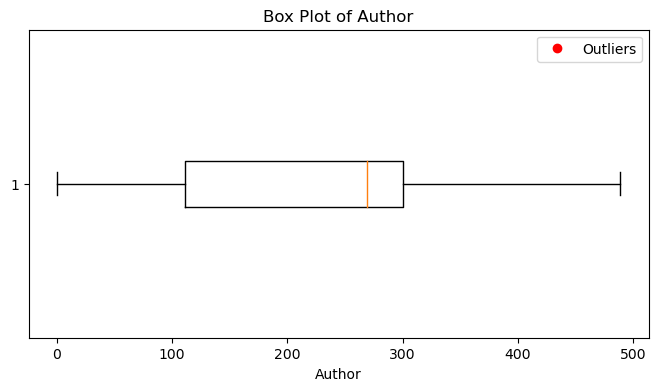

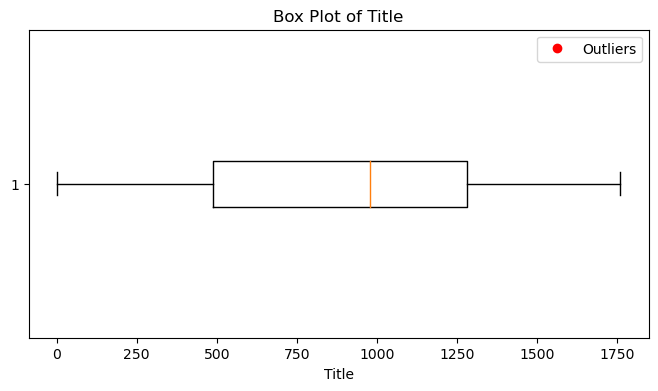

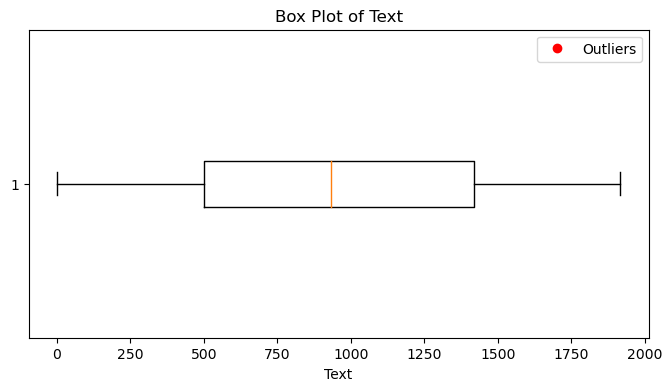

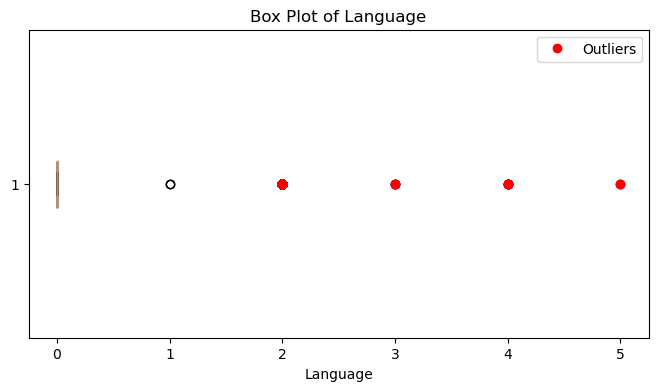

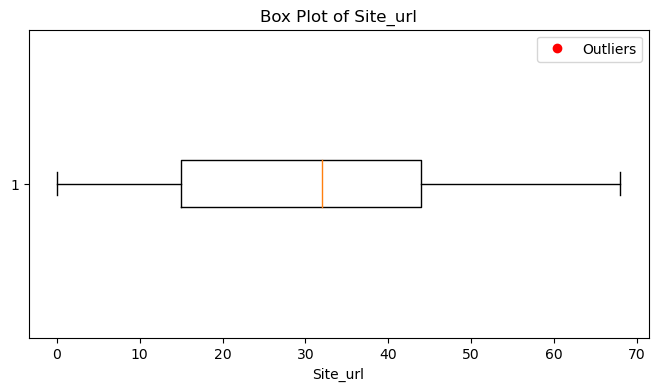

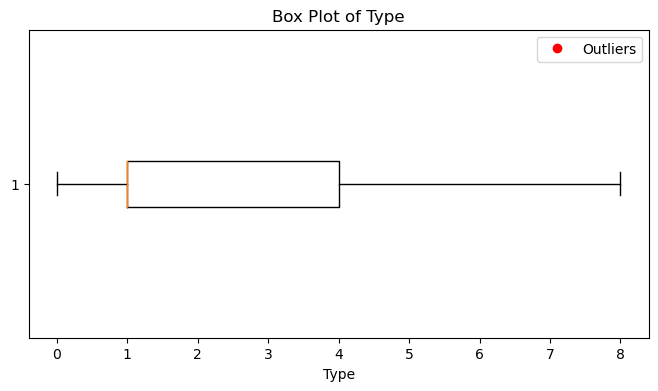

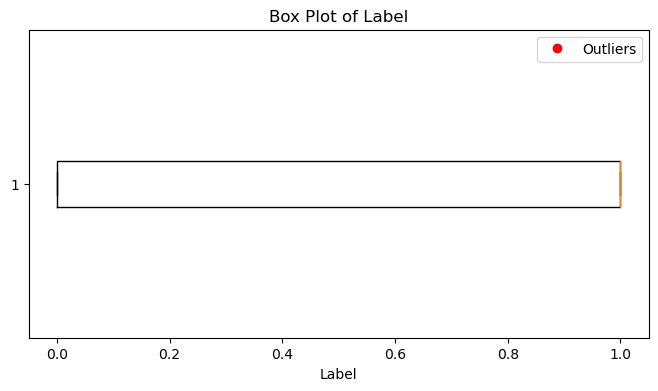

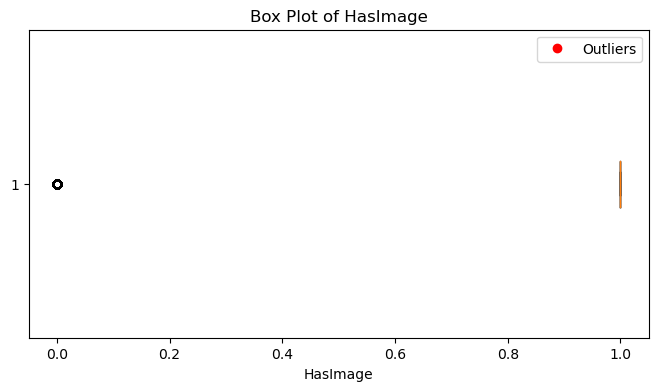

In [21]:
# import matplotlib.pyplot as plt

# Create a copy of the data to preserve the original DataFrame
data_copy = data.copy()

# Iterate through each numeric column and create box plots
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 4))
    plt.title(f'Box Plot of {column}')
    plt.boxplot(data_copy[column], vert=False)
    
    # Mark the outliers in red
    outliers_column = data_copy[column][outliers[column]]
    plt.plot(outliers_column, [1] * len(outliers_column), 'ro', label='Outliers')
    
    plt.xlabel(column)
    plt.legend()
    plt.show()
# This code will generate box plots for each numeric column in your DataFrame and mark the outliers in red. 
# You can adjust the figure size, labels, and other plot settings as needed.

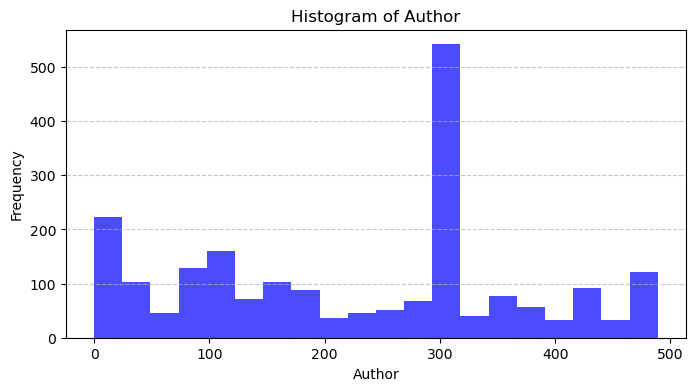

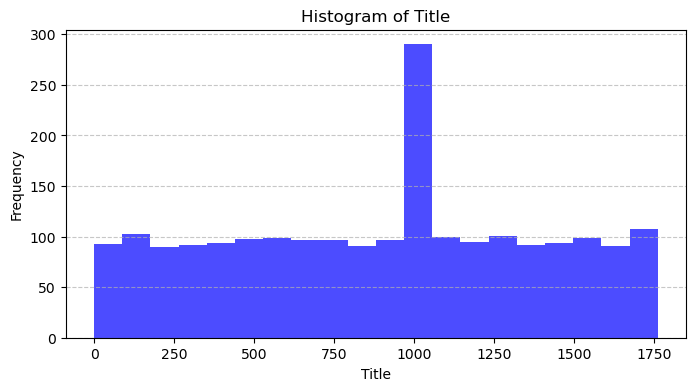

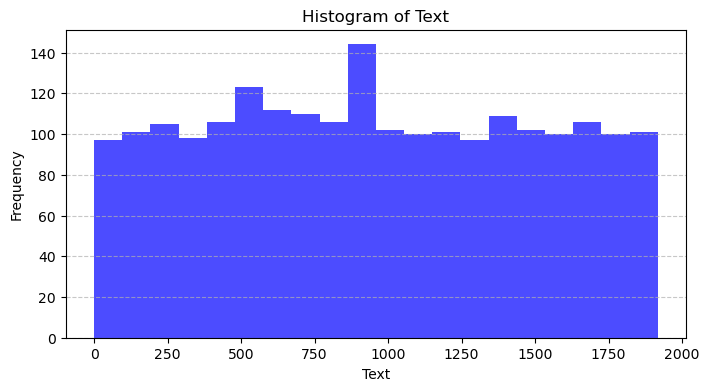

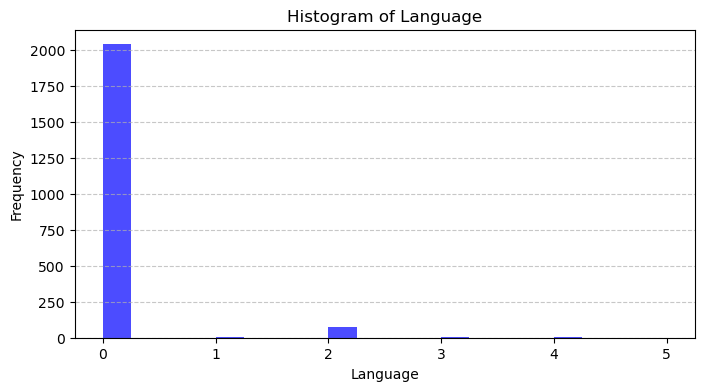

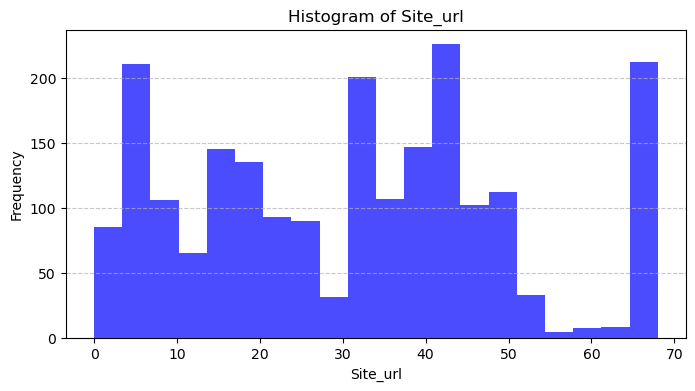

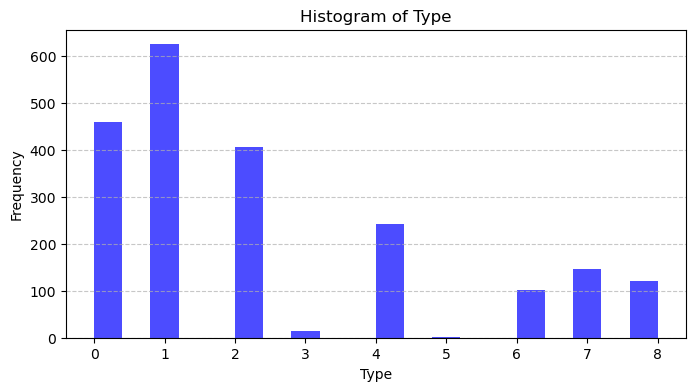

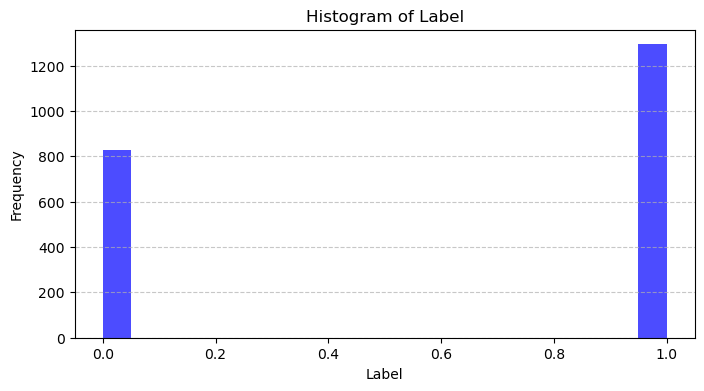

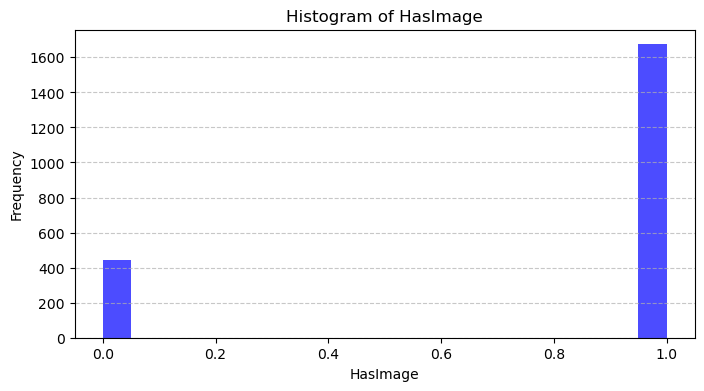

In [22]:
# To plot histograms for each variable in your DataFrame, you can use the following code. 
# This code will create individual histograms for each numeric column:


import matplotlib.pyplot as plt

# Select only the numeric columns for histogram plotting
numeric_columns = data.select_dtypes(include=['int', 'float'])

# Set the number of bins for the histograms
num_bins = 20  # You can adjust the number of bins as needed

# Iterate through each numeric column and create histograms
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(data[column], bins=num_bins, color='blue', alpha=0.7)
    
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.show()
 

In [23]:
#describe
data.describe()

,Author,Title,Text,Language,Site_url,Type,Label,HasImage
count,2120.000000,2120.000000,2120.000000,2120.000000,2120.000000,2120.000000,2120.000000,2120.000000
mean,226.298113,898.215566,952.833019,0.079717,30.854245,2.389623,0.610377,0.789623
std,139.934296,487.450684,543.870808,0.416466,19.100859,2.456432,0.487780,0.407673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,111.000000,488.750000,501.750000,0.000000,15.000000,1.000000,0.000000,1.000000
50%,269.500000,977.500000,931.000000,0.000000,32.000000,1.000000,1.000000,1.000000
75%,300.000000,1281.250000,1419.250000,0.000000,44.000000,4.000000,1.000000,1.000000
max,489.000000,1761.000000,1917.000000,5.000000,68.000000,8.000000,1.000000,1.000000


In [24]:
#counting the vaue 
data.value_counts()

Author  Title  Text  Language  Site_url  Type  Label  HasImage
30      1025   1689  0         4         1     1      0.0         5
               757   0         4         1     1      0.0         4
               212   0         4         1     1      0.0         4
               1709  0         4         1     1      0.0         3
               1488  0         4         1     1      0.0         3
                                                                 ..
156     1675   799   0         13        1     1      1.0         1
        1579   1154  0         13        1     1      1.0         1
        1482   1086  0         13        1     1      1.0         1
        1474   372   0         13        1     1      1.0         1
489     1713   1152  0         5         1     1      1.0         1
Name: count, Length: 2020, dtype: int64

In [25]:
#to find the corelation 
# 1 indicates a strong positive correlation.
# -1 indicates a strong negative correlation.
# 0 indicates no linear correlation.

data.corr()

,Author,Title,Text,Language,Site_url,Type,Label,HasImage
Author,1.000000,0.006492,0.057139,0.276131,0.057256,0.168927,0.171231,0.163297
Title,0.006492,1.000000,0.000529,0.003249,0.048794,0.016018,-0.086666,-0.043252
Text,0.057139,0.000529,1.000000,0.028042,0.150661,-0.030096,-0.124908,0.034769
Language,0.276131,0.003249,0.028042,1.000000,-0.001742,-0.077428,0.108828,0.082147
Site_url,0.057256,0.048794,0.150661,-0.001742,1.000000,0.059095,-0.433496,0.008363
Type,0.168927,0.016018,-0.030096,-0.077428,0.059095,1.000000,0.009385,-0.023670
Label,0.171231,-0.086666,-0.124908,0.108828,-0.433496,0.009385,1.000000,-0.113372
HasImage,0.163297,-0.043252,0.034769,0.082147,0.008363,-0.023670,-0.113372,1.000000


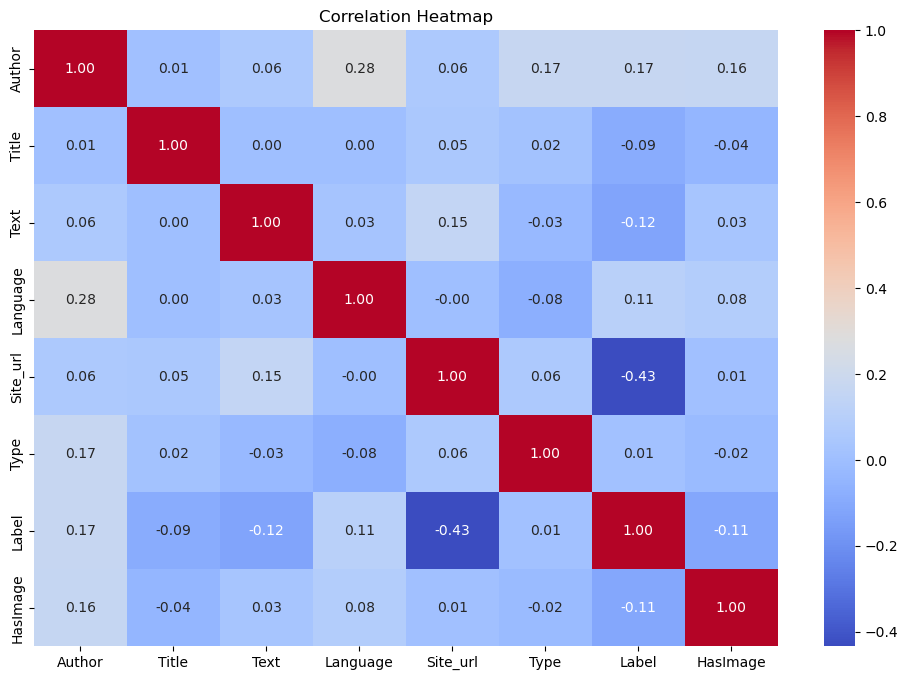

In [26]:
#to visualize the corelation matrix heat map is used

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


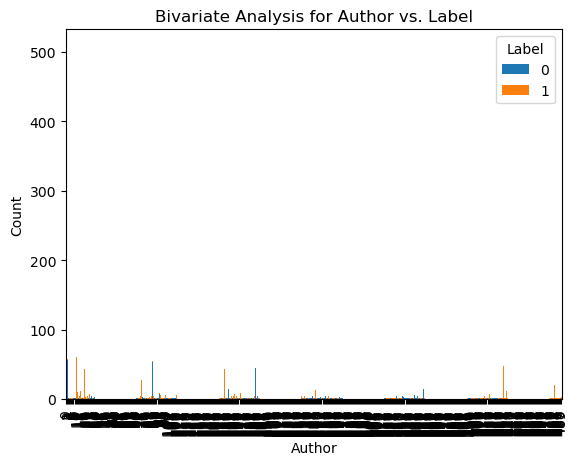

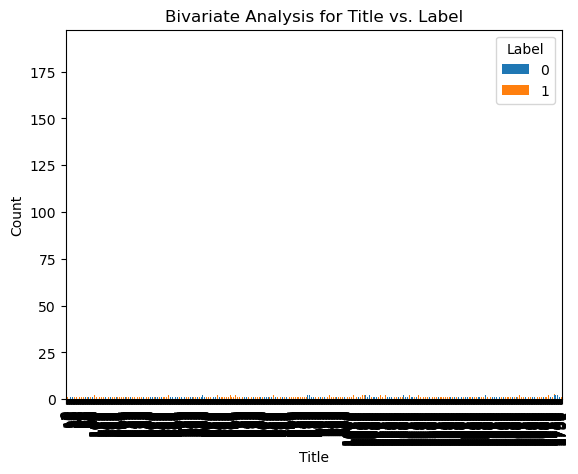

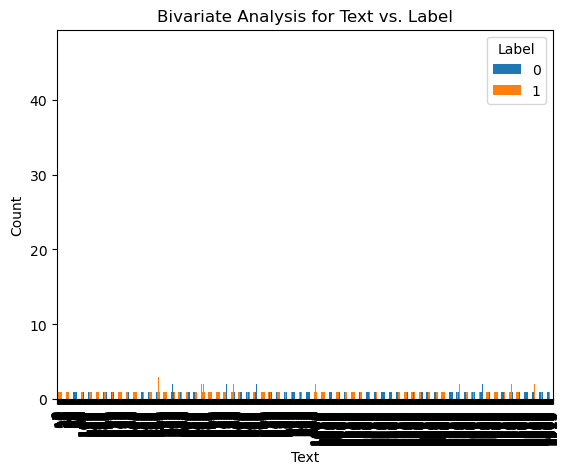

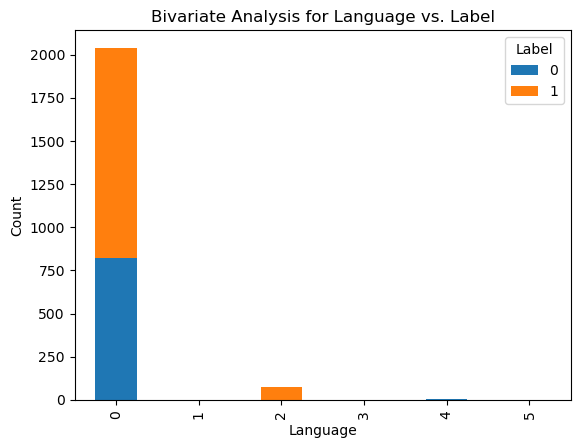

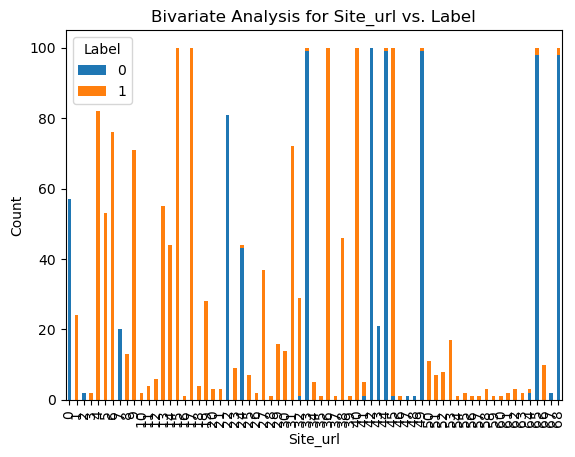

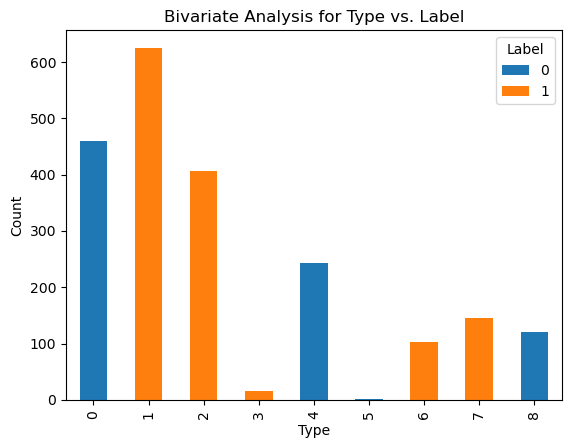

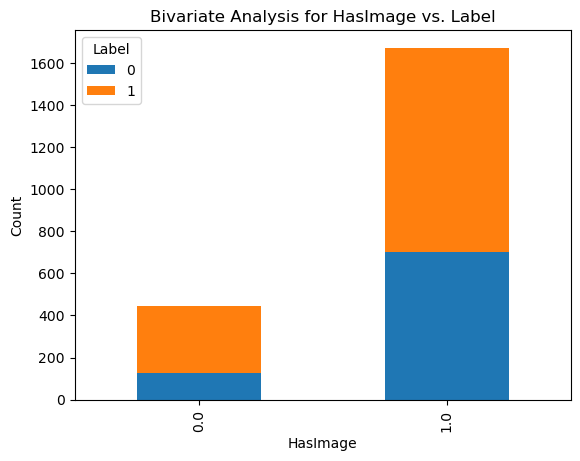

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with all columns as numerical including 'Label'

# List of all independent attributes (including numerical columns)
independent_columns = ['Author', 'Title', 'Text', 'Language', 'Site_url', 'Type', 'HasImage']

# Iterate through each independent variable
for column in independent_columns:
    # Create a cross-tabulation between the independent and dependent variables
    crosstab = pd.crosstab(data[column], data['Label'])
    
    # Plot a stacked bar chart for the cross-tabulation
    crosstab.plot(kind='bar', stacked=True)
    
    # Add labels and title
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Bivariate Analysis for {column} vs. Label')
    
    # Show the plot
    plt.show()


In [28]:
# there are other ways to perform bivariate analysis between your independent attributes 
# and the dependent attribute 'Label.' Here are a few alternative methods:
#first way=Correlation Matrix
correlation_matrix = data.corr()
correlation_with_label = correlation_matrix['Label'].sort_values(ascending=False)
print(correlation_with_label)


Label       1.000000
Author      0.171231
Language    0.108828
Type        0.009385
Title      -0.086666
HasImage   -0.113372
Text       -0.124908
Site_url   -0.433496
Name: Label, dtype: float64


C:\Users\pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


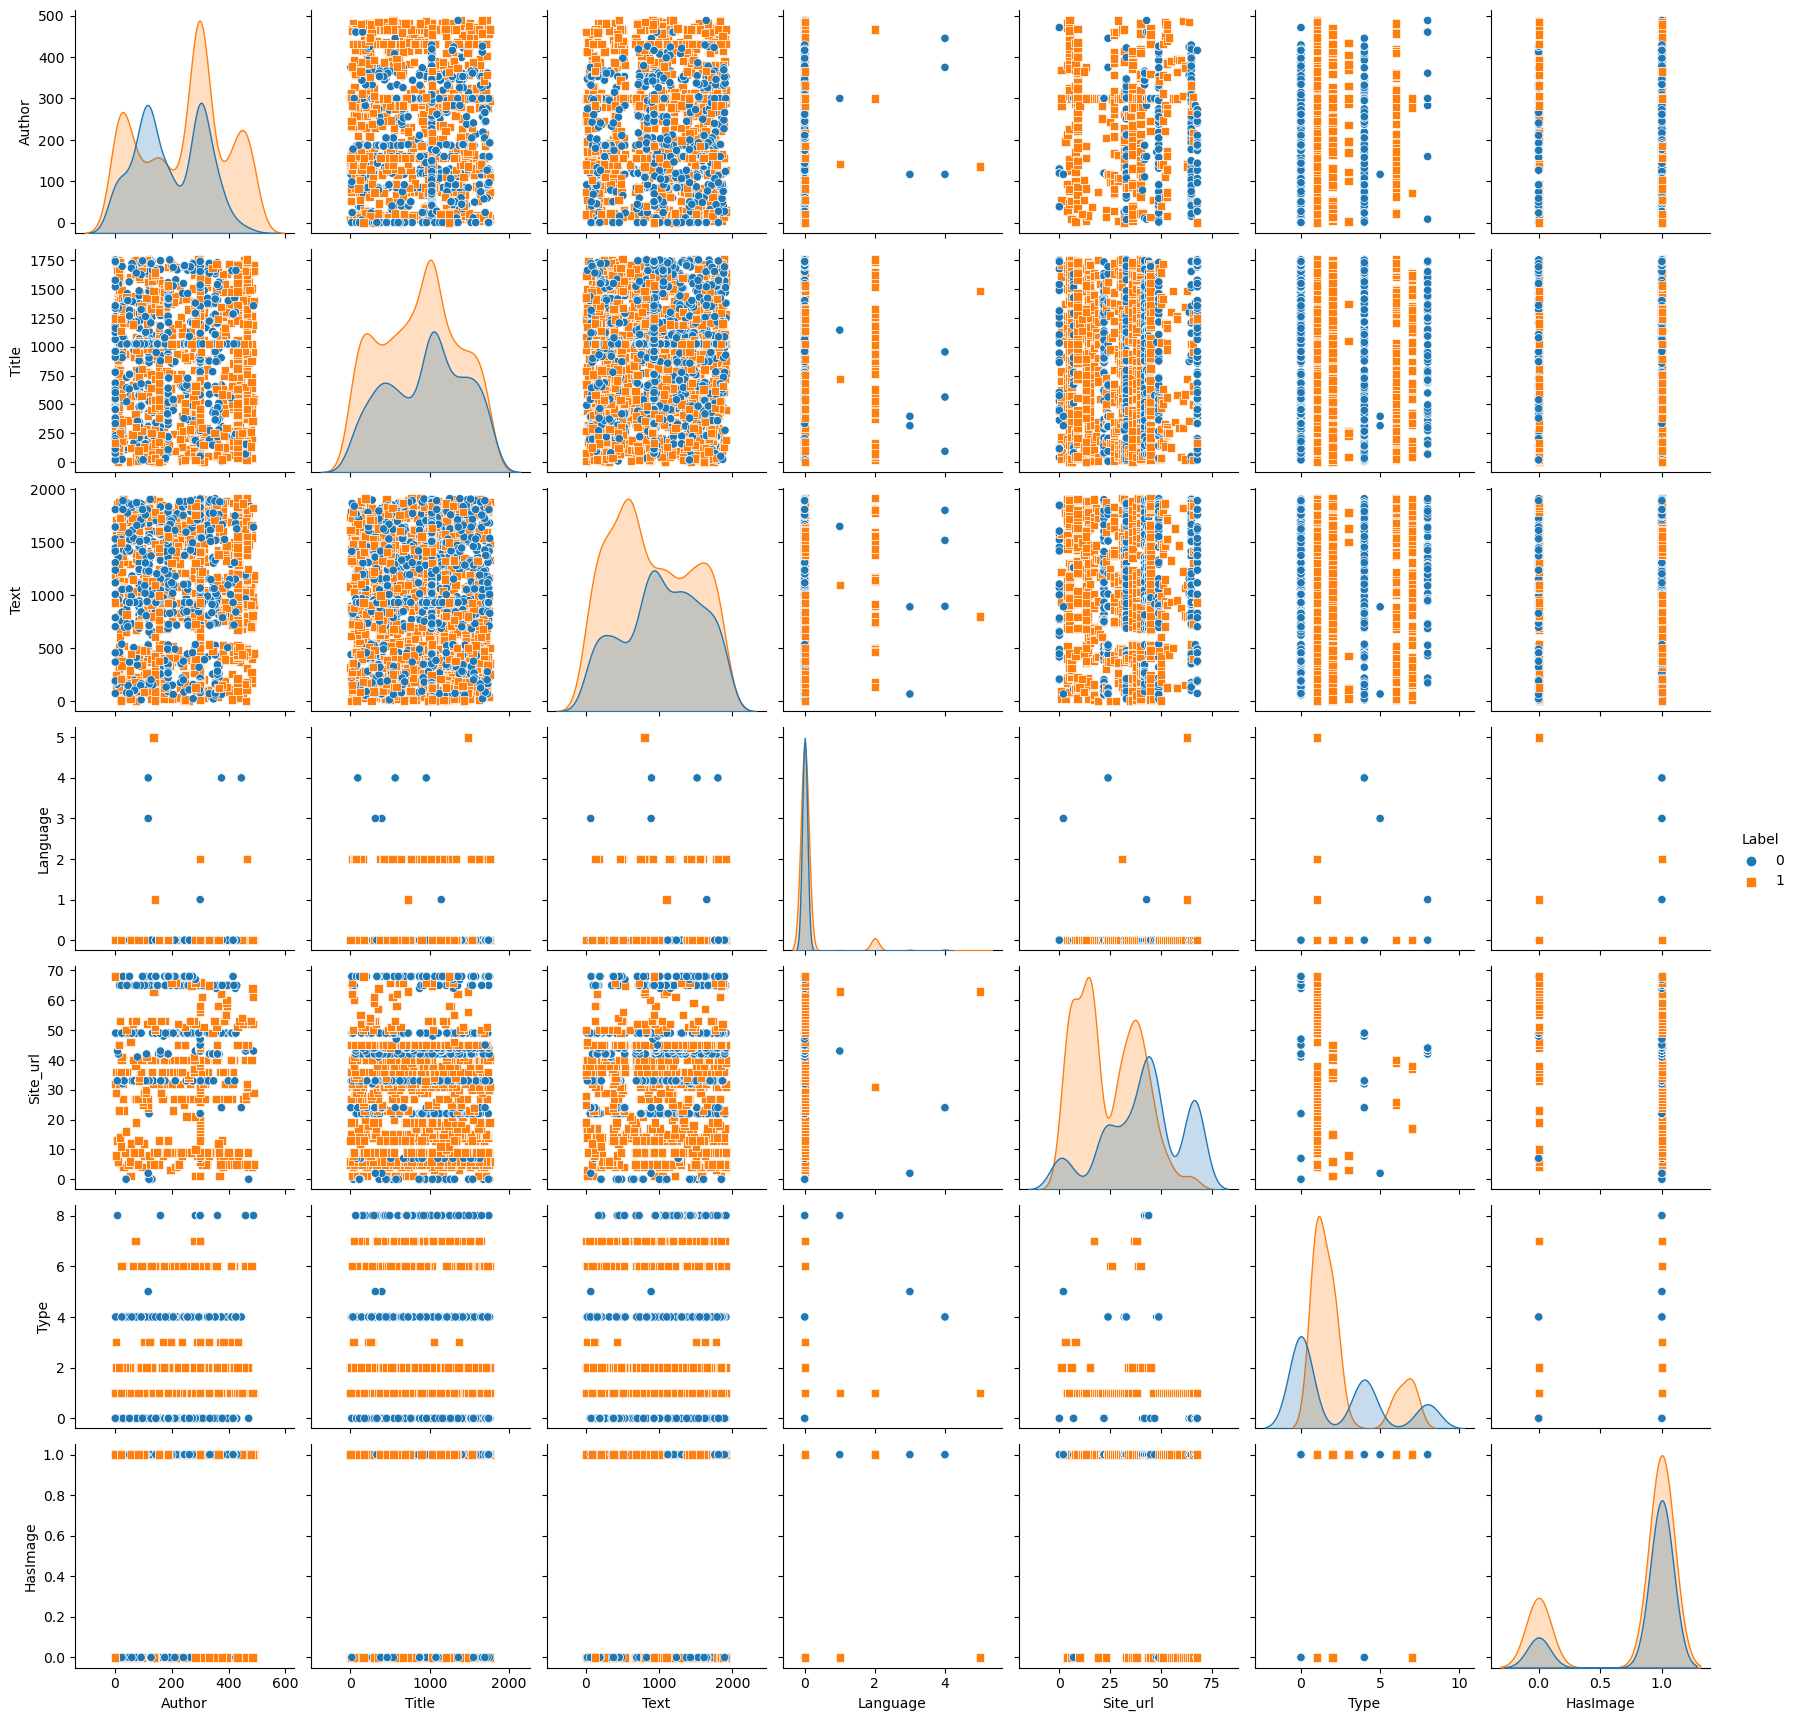

In [29]:
#second way=Pairplots
import seaborn as sns

# Select a subset of columns for pair plotting
selected_columns = ['Label','Author', 'Title', 'Text', 'Language', 'Site_url', 'Type', 'HasImage']
sns.pairplot(data[selected_columns], hue='Label', markers=["o", "s"])


In [30]:
# To perform bivariate analysis between each of your independent attributes ('Author', 'Title', 'Text', 'Language', 'Site_url', 'Type', 'HasImage')
# and the dependent attribute 'Label,' you can use various statistical tests. Since your 'Label' column is binary (0 or 1), 
# you can use methods like t-tests for continuous variables ('Title') and chi-squared tests for categorical variables 
# ('Author', 'Language', 'Type', 'Site_url', 'HasImage').

# Here's a code example that performs bivariate analysis for each of these columns with 'Label':

# This code iterates through your independent columns, checks their data types, and performs t-tests for numeric columns 
# and chi-squared tests for categorical columns with 'Label.' It reports whether the bivariate analysis is statistically significant.

# Remember to replace 'your_dataset.csv' with the actual file path to your dataset. This code will provide you with insights into the relationships
# between each independent attribute and 'Label.'



In [31]:
# import pandas as pd
# from scipy.stats import ttest_ind, chi2_contingency



# # List of independent columns
# independent_columns = ['Author', 'Title', 'Text', 'Language', 'Site_url', 'Type', 'HasImage']

# # Iterate through each independent column
# for column in independent_columns:
#     if data[column].dtype in [int, float]:
#         # Independent variable is numeric
#         real_group = data[data['Label'] == 0][column]
#         fake_group = data[data['Label'] == 1][column]
        
#         # Perform a t-test
#         t_statistic, p_value = ttest_ind(real_group, fake_group, equal_var=False)
#     else:
#         # Independent variable is categorical
#         contingency_table = pd.crosstab(data[column], data['Label'])
        
#         # Perform a chi-squared test
#         chi2, p_value, dof, expected = chi2_contingency(contingency_table)

#     alpha = 0.05

#     # Check for statistical significance
#     if p_value < alpha:
#         print(f"Bivariate analysis for {column}: Statistically significant (p-value = {p_value})")
#     else:
#         print(f"Bivariate analysis for {column}: Not statistically significant (p-value = {p_value})")


<Figure size 1500x1000 with 0 Axes>

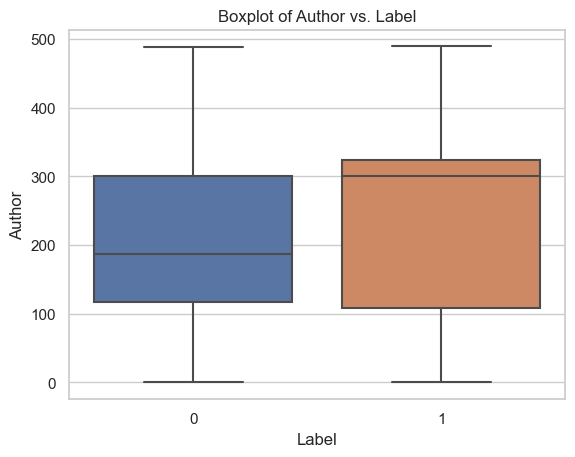

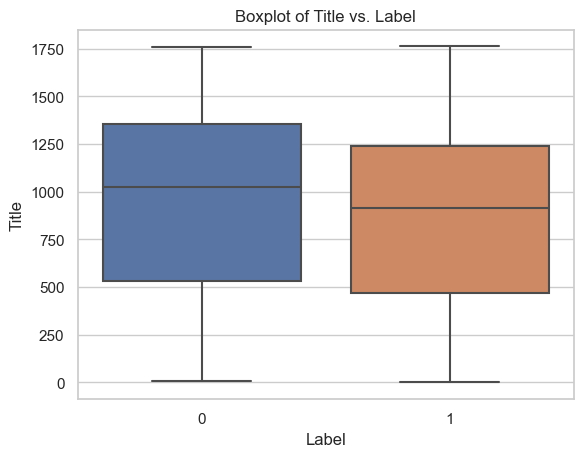

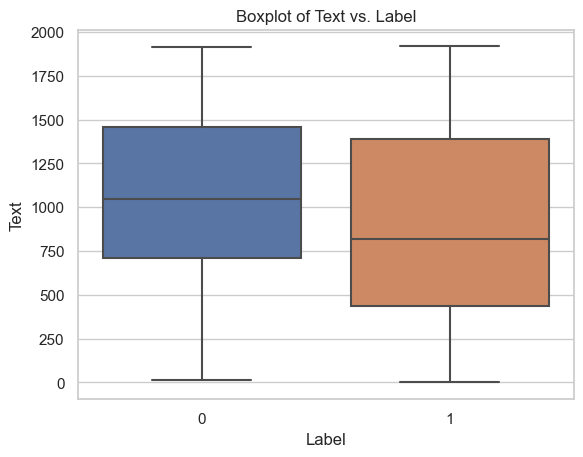

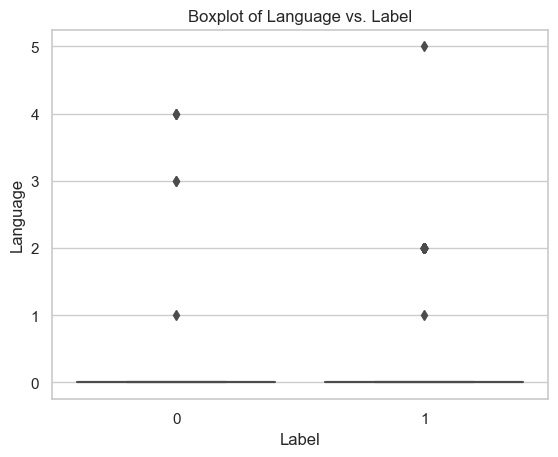

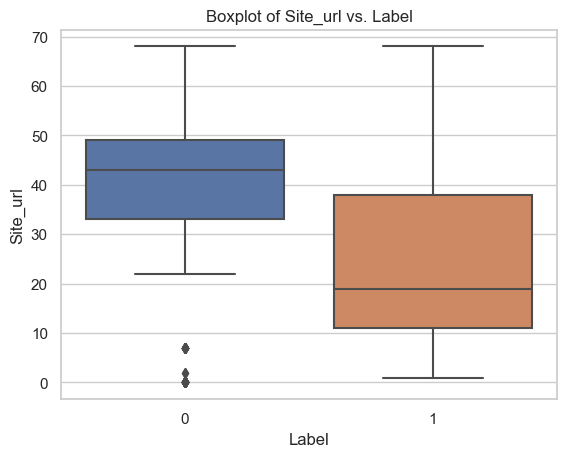

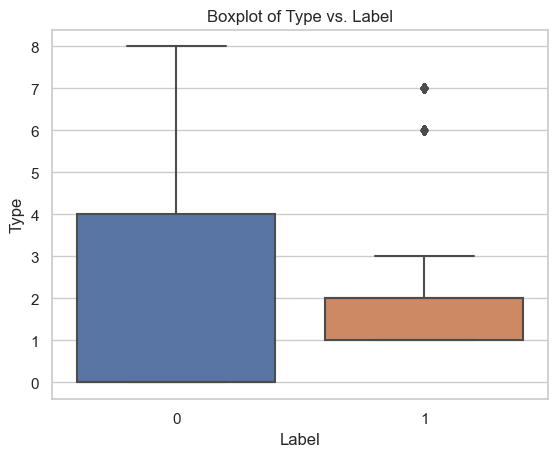

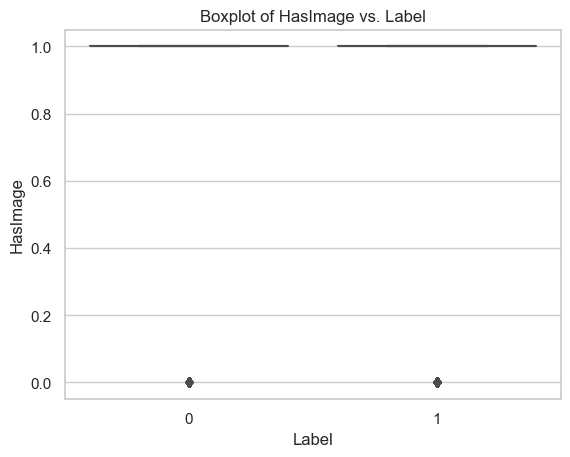

In [32]:
#Bivariate analysis-----> BOX PLOT
import matplotlib.pyplot as plt
import seaborn as sns



# List of independent variables
independent_variables = ['Author', 'Title', 'Text', 'Language', 'Site_url', 'Type', 'HasImage']

# Set the figure size and style
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Iterate through each independent variable and create a boxplot
for var in independent_variables:
    plt.figure()
    sns.boxplot(x='Label', y=var, data=data)
    plt.title(f'Boxplot of {var} vs. Label')
    plt.show()


In [33]:
#Bivariate analysis-----> TT TEST
from scipy import stats



# List of independent variables
independent_variables = ['Author', 'Title', 'Text', 'Language', 'Site_url', 'Type', 'HasImage']

# Iterate through each independent variable and perform a t-test
for var in independent_variables:
    real_data = data[data['Label'] == 0][var]
    fake_data = data[data['Label'] == 1][var]
    
    t_statistic, p_value = stats.ttest_ind(real_data, fake_data, equal_var=False)
    
    if p_value < 0.05:  # You can adjust the significance level (alpha) as needed
        print(f'T-test for {var}: Statistically significant (p-value = {p_value})')
    else:
        print(f'T-test for {var}: Not statistically significant (p-value = {p_value})')


T-test for Author: Statistically significant (p-value = 7.557435066928791e-17)
T-test for Title: Statistically significant (p-value = 6.383234242238845e-05)
T-test for Text: Statistically significant (p-value = 5.569460794089869e-09)
T-test for Language: Statistically significant (p-value = 2.3750590436015276e-08)
T-test for Site_url: Statistically significant (p-value = 3.048137748426251e-87)
T-test for Type: Not statistically significant (p-value = 0.6874886684712701)
T-test for HasImage: Statistically significant (p-value = 5.226993634283959e-08)


In [34]:
#Bivariate analysis----->CROSS TAB
import pandas as pd



# List of independent variables
independent_variables = ['Author', 'Title', 'Text', 'Language', 'Site_url', 'Type', 'HasImage']

# Iterate through each independent variable and create a crosstab
for var in independent_variables:
    crosstab = pd.crosstab(index=data[var], columns=data['Label'], rownames=['Categories'], colnames=['Label'], margins=True, margins_name='Total')
    
    print(f'===========CROSSTAB FOR {var}===========\n')
    
    print(crosstab)
    print('\n')


===========CROSSTAB FOR Author===========

Label         0     1  Total
Categories                  
0             0     3      3
1            56     2     58
2             1     0      1
3             0     1      1
4             0     2      2
...         ...   ...    ...
486           0     1      1
487           0     1      1
488           1     1      2
489           0     3      3
Total       826  1294   2120

[491 rows x 3 columns]


===========CROSSTAB FOR Title===========

Label         0     1  Total
Categories                  
0             0     1      1
1             0     1      1
2             0     2      2
3             0     1      1
4             0     1      1
...         ...   ...    ...
1758          1     0      1
1759          0     1      1
1760          0     1      1
1761          0     1      1
Total       826  1294   2120

[1763 rows x 3 columns]


===========CROSSTAB FOR Text===========

Label         0     1  Total
Categories                  
0        

In [35]:
#Bivariate analysis----->CHI - SQUARE TEST
import pandas as pd
from scipy.stats import chi2_contingency



# List of independent variables
independent_variables = ['Author', 'Title', 'Text', 'Language', 'Site_url', 'Type', 'HasImage']

# Iterate through each independent variable and perform a chi-square test
for var in independent_variables:
    observed = pd.crosstab(data[var], data['Label'])
    chi2, p, _, _ = chi2_contingency(observed)
    
    print(f'=====Chi-square test for {var}:=====')
    print(f'Chi-square value: {chi2}')
    print(f'P-value: {p}')
    print('\n')


=====Chi-square test for Author:=====
Chi-square value: 1576.8033152096727
P-value: 1.4632861462427207e-114


=====Chi-square test for Title:=====
Chi-square value: 1917.1724127698803
P-value: 0.005104170816597659


=====Chi-square test for Text:=====
Chi-square value: 2087.792127298874
P-value: 0.003560994667022425


=====Chi-square test for Language:=====
Chi-square value: 55.83936495510891
P-value: 8.769656973957242e-11


=====Chi-square test for Site_url:=====
Chi-square value: 2072.528775104902
P-value: 0.0


=====Chi-square test for Type:=====
Chi-square value: 2120.0
P-value: 0.0


=====Chi-square test for HasImage:=====
Chi-square value: 26.681199720263518
P-value: 2.399448251018171e-07




In [36]:
#Splitting dependent and independent variable and Creating dummies.

X = data[['Author', 'Title', 'Text', 'Language', 'Site_url', 'Type', 'HasImage']]
y = data['Label']

# Create dummy variables for categorical columns
X = pd.get_dummies(X, columns=['Author', 'Language', 'Type'], drop_first=True)


In [37]:
X = X.apply(pd.to_numeric, errors='coerce')

In [38]:
# Splitting Train and Test Data Set
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (customize test_size and random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
X_train.dtypes

Title         int32
Text          int32
Site_url      int32
HasImage    float64
Author_1       bool
             ...   
Type_4         bool
Type_5         bool
Type_6         bool
Type_7         bool
Type_8         bool
Length: 506, dtype: object

In [40]:
X_train.columns

Index(['Title', 'Text', 'Site_url', 'HasImage', 'Author_1', 'Author_2',
       'Author_3', 'Author_4', 'Author_5', 'Author_6',
       ...
       'Language_4', 'Language_5', 'Type_1', 'Type_2', 'Type_3', 'Type_4',
       'Type_5', 'Type_6', 'Type_7', 'Type_8'],
      dtype='object', length=506)

In [41]:
# #Logistic Regression Model and Summary
# import statsmodels.api as sm

# # Convert labels to 0 and 1 (assuming 'real' corresponds to 0 and 'fake' corresponds to 1)
# y_train = y_train.map({'real': 0, 'fake': 1})

# # Add a constant (intercept) to the independent variables
# X_train = sm.add_constant(X_train)

# # Fit the logistic regression model
# model = sm.Logit(y_train, X_train)
# result = model.fit()

# # Print the summary
# print(result.summary())


In [42]:
y_train.dtypes

dtype('int64')

In [43]:
X_train.dtypes

Title         int32
Text          int32
Site_url      int32
HasImage    float64
Author_1       bool
             ...   
Type_4         bool
Type_5         bool
Type_6         bool
Type_7         bool
Type_8         bool
Length: 506, dtype: object

In [44]:
print(X_train.columns)


Index(['Title', 'Text', 'Site_url', 'HasImage', 'Author_1', 'Author_2',
       'Author_3', 'Author_4', 'Author_5', 'Author_6',
       ...
       'Language_4', 'Language_5', 'Type_1', 'Type_2', 'Type_3', 'Type_4',
       'Type_5', 'Type_6', 'Type_7', 'Type_8'],
      dtype='object', length=506)


In [45]:
non_numeric_columns = X_train.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

Index(['Author_1', 'Author_2', 'Author_3', 'Author_4', 'Author_5', 'Author_6',
       'Author_7', 'Author_8', 'Author_9', 'Author_10',
       ...
       'Language_4', 'Language_5', 'Type_1', 'Type_2', 'Type_3', 'Type_4',
       'Type_5', 'Type_6', 'Type_7', 'Type_8'],
      dtype='object', length=502)


In [46]:
# Create a list of author columns by selecting columns that start with 'Author_'
author_columns = [col for col in X_train.columns if col.startswith('Author_')]

# Apply get_dummies to all author columns
X_train = pd.get_dummies(X_train, columns=author_columns, drop_first=True)


In [47]:
# Create a list of author columns by selecting columns that start with 'Author_'
language_columns = [col for col in X_train.columns if col.startswith('Language_')]

# Apply get_dummies to all author columns
X_train = pd.get_dummies(X_train, columns=language_columns, drop_first=True)


In [48]:
# Create a list of type columns by selecting columns that start with 'Type_'
type_columns = [col for col in X_train.columns if col.startswith('Type_')]

# Apply get_dummies to all type columns
X_train = pd.get_dummies(X_train, columns=type_columns, drop_first=True)


In [49]:
X_train.columns

Index(['Title', 'Text', 'Site_url', 'HasImage', 'Author_1_True',
       'Author_2_True', 'Author_3_True', 'Author_4_True', 'Author_5_True',
       'Author_7_True',
       ...
       'Language_3_True', 'Language_4_True', 'Type_1_True', 'Type_2_True',
       'Type_3_True', 'Type_4_True', 'Type_5_True', 'Type_6_True',
       'Type_7_True', 'Type_8_True'],
      dtype='object', length=433)

In [50]:
# # Create dummy variables for categorical columns
# X_train = pd.get_dummies(X_train, columns=['Author_'], drop_first=True)

# # Create a list of language columns by selecting columns that start with 'Language_'
# language_columns = [col for col in X_train.columns if col.startswith('Language_')]

# # Apply get_dummies to all language columns
# X_train = pd.get_dummies(X_train, columns=language_columns, drop_first=True)

# # Create a list of type columns by selecting columns that start with 'Type_'
# type_columns = [col for col in X_train.columns if col.startswith('Type_')]

# # Apply get_dummies to all type columns
# X_train = pd.get_dummies(X_train, columns=type_columns, drop_first=True)

# # Splitting dependent and independent variable and Creating dummies

# # ... (rest of your code)

# # Fit the logistic regression model
# model = sm.Logit(y_train, X_train)
# result = model.fit()

# # Display the summary
# result.summary()


In [51]:
# # Create dummy variables for categorical columns
# author_columns = [col for col in X_train.columns if col.startswith('Author_')]
# X_train = pd.get_dummies(X_train, columns=author_columns, drop_first=True)

# language_columns = [col for col in X_train.columns if col.startswith('Language_')]
# X_train = pd.get_dummies(X_train, columns=language_columns, drop_first=True)

# type_columns = [col for col in X_train.columns if col.startswith('Type_')]
# X_train = pd.get_dummies(X_train, columns=type_columns, drop_first=True)

# # Splitting dependent and independent variable (if you haven't done this already)
# ...

# # Fit the logistic regression model
# model = sm.Logit(y_train, X_train)
# result = model.fit()

# # Display the summary
# result.summary()


In [52]:
import statsmodels.api as sm

# Define your dependent variable (y) and independent variables (X)
y = data['Label']
X = data[['Title', 'Text', 'Site_url', 'HasImage', 'Author', 'Language', 'Type']]

# Fit the logistic regression model
X = sm.add_constant(X)  # Add a constant term to the model
model = sm.Logit(y, X)
result = model.fit()

# Display the summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.521209
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Label   No. Observations:                 2120
Model:                          Logit   Df Residuals:                     2112
Method:                           MLE   Df Model:                            7
Date:                Mon, 30 Oct 2023   Pseudo R-squ.:                  0.2204
Time:                        16:02:52   Log-Likelihood:                -1105.0
converged:                       True   LL-Null:                       -1417.4
Covariance Type:            nonrobust   LLR p-value:                1.082e-130
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9038      0.220     13.201      0.000       2.473       3.335
Title         -0.0004      0.

In [53]:
X_train.dtypes

Title              int32
Text               int32
Site_url           int32
HasImage         float64
Author_1_True       bool
                  ...   
Type_4_True         bool
Type_5_True         bool
Type_6_True         bool
Type_7_True         bool
Type_8_True         bool
Length: 433, dtype: object

In [54]:
X_train.isnull().sum()

Title            0
Text             0
Site_url         0
HasImage         0
Author_1_True    0
                ..
Type_4_True      0
Type_5_True      0
Type_6_True      0
Type_7_True      0
Type_8_True      0
Length: 433, dtype: int64

In [55]:
y_train.isnull().sum()

0

In [56]:
X_train.dtypes

Title              int32
Text               int32
Site_url           int32
HasImage         float64
Author_1_True       bool
                  ...   
Type_4_True         bool
Type_5_True         bool
Type_6_True         bool
Type_7_True         bool
Type_8_True         bool
Length: 433, dtype: object

In [57]:
# Check the columns in X_train and X_test
train_columns = X_train.columns
test_columns = X_test.columns

# Compare the columns
if train_columns.equals(test_columns):
    print("Columns in X_train and X_test match.")
else:
    print("Columns in X_train and X_test do not match.")
    print("Columns in X_train:", train_columns)
    print("Columns in X_test:", test_columns)


Columns in X_train and X_test do not match.
Columns in X_train: Index(['Title', 'Text', 'Site_url', 'HasImage', 'Author_1_True',
       'Author_2_True', 'Author_3_True', 'Author_4_True', 'Author_5_True',
       'Author_7_True',
       ...
       'Language_3_True', 'Language_4_True', 'Type_1_True', 'Type_2_True',
       'Type_3_True', 'Type_4_True', 'Type_5_True', 'Type_6_True',
       'Type_7_True', 'Type_8_True'],
      dtype='object', length=433)
Columns in X_test: Index(['Title', 'Text', 'Site_url', 'HasImage', 'Author_1', 'Author_2',
       'Author_3', 'Author_4', 'Author_5', 'Author_6',
       ...
       'Language_4', 'Language_5', 'Type_1', 'Type_2', 'Type_3', 'Type_4',
       'Type_5', 'Type_6', 'Type_7', 'Type_8'],
      dtype='object', length=506)


In [58]:
# Identify and add any missing columns from X_train to X_test
missing_columns = list(set(X_train.columns) - set(X_test.columns))
default_value = 0  # You can set this to any default value you prefer

# Create a DataFrame containing the missing columns with default values
missing_data = pd.DataFrame({col: [default_value] * len(X_test) for col in missing_columns}, index=X_test.index)

# Concatenate the missing data with X_test
X_test = pd.concat([X_test, missing_data], axis=1)

# Reorder the columns in X_test to match the order in X_train
X_test = X_test[X_train.columns]

# Now, you should have the same columns in both X_train and X_test


In [59]:
# Check the modified X_test DataFrame
print(X_test)


      Title  Text  Site_url  HasImage  Author_1_True  Author_2_True  \
812     506   518        23       0.0              0              0   
1406   1518   323        42       1.0              0              0   
289    1514   291         6       0.0              0              0   
1606   1096  1458        44       1.0              0              0   
1937   1025   150        65       1.0              0              0   
...     ...   ...       ...       ...            ...            ...   
1258   1620    11        38       0.0              0              0   
1691     64  1173        45       0.0              0              0   
218    1243   283         6       0.0              0              0   
579     527   553        15       1.0              0              0   
2085   1064   931        68       1.0              0              0   

      Author_3_True  Author_4_True  Author_5_True  Author_7_True  ...  \
812               0              0              0              0  ...   
1

In [60]:
# #validation
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# # Make predictions on the test data
# y_pred = result.predict(X_test)
# y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary values (0 or 1)

# # Calculate confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred_binary)
# print("Confusion Matrix:\n", conf_matrix)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred_binary)
# print("Accuracy:", accuracy)

# # Calculate precision
# precision = precision_score(y_test, y_pred_binary)
# print("Precision:", precision)

# # Calculate recall
# recall = recall_score(y_test, y_pred_binary)
# print("Recall:", recall)

# # Calculate F1-score
# f1 = f1_score(y_test, y_pred_binary)
# print("F1 Score:", f1)

# # Calculate ROC AUC
# roc_auc = roc_auc_score(y_test, y_pred)
# print("ROC AUC:", roc_auc)


In [61]:
# Step 1: Ensure Matching Features
# Check if columns in X_test match X_train
mismatched_columns = set(X_train.columns) - set(X_test.columns)
print("Mismatched columns between X_train and X_test:", mismatched_columns)

Mismatched columns between X_train and X_test: set()


In [62]:
# Step 2: Check for Missing Columns
missing_columns = set(X_test.columns) - set(X_train.columns)
print("Missing columns in X_train:", missing_columns)


Missing columns in X_train: set()


In [63]:
# Step 3: Ensure Consistent Preprocessing
# Verify data types, encoding, scaling, and other preprocessing steps
# Make sure X_train and X_test are consistent in preprocessing
# Example:
# 1. If you used Label Encoding, make sure it's applied consistently to both X_train and X_test.
# 2. If you scaled the data, ensure the same scaling factors are used for both datasets.
# 3. If you imputed missing values, apply the same imputation strategy.

# # Step 3: Make predictions on the test data
# y_pred = result.predict(X_test)
# y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary values (0 or 1)


In [64]:
# Step 4: Verify Column Names and Order
# Ensure both X_train and X_test have the same column names and order
# Reorder columns in X_test to match X_train if needed
X_test = X_test[X_train.columns]

In [65]:
# Step 5: Recheck Data Split
# Ensure that data was split correctly into training and testing sets
# Double-check the indices used for the split
from sklearn.model_selection import train_test_split

# Check if the shapes of X_train and X_test are consistent
if X_train.shape[0] + X_test.shape[0] == data.shape[0]:
    print("Data split is consistent.")
else:
    print("Data split is inconsistent.")


Data split is consistent.


In [66]:
print(X_train.dtypes)
print(X_test.dtypes)


Title              int32
Text               int32
Site_url           int32
HasImage         float64
Author_1_True       bool
                  ...   
Type_4_True         bool
Type_5_True         bool
Type_6_True         bool
Type_7_True         bool
Type_8_True         bool
Length: 433, dtype: object
Title              int32
Text               int32
Site_url           int32
HasImage         float64
Author_1_True      int64
                  ...   
Type_4_True        int64
Type_5_True        int64
Type_6_True        int64
Type_7_True        int64
Type_8_True        int64
Length: 433, dtype: object


In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the data
y_pred = result.predict(X)
y_pred_binary = (y_pred > 0.5).astype(int)

In [68]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y, y_pred_binary)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 496  330]
 [ 202 1092]]


In [69]:
# Calculate specificity
specificity = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])

# Calculate sensitivity
sensitivity = conf_matrix[1][1] / (conf_matrix[1][0] + conf_matrix[1][1])

print(f"Specificity: {specificity}")
print(f"Sensitivity: {sensitivity}")

Specificity: 0.6004842615012107
Sensitivity: 0.8438948995363215


In [70]:
# Calculate accuracy
accuracy = accuracy_score(y, y_pred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.7490566037735849


In [71]:
# Calculate precision
precision = precision_score(y, y_pred_binary)
print("Precision:", precision)

Precision: 0.7679324894514767


In [72]:
# Calculate recall
recall = recall_score(y, y_pred_binary)
print("Recall:", recall)

Recall: 0.8438948995363215


In [73]:
# Calculate F1 score
f1 = f1_score(y, y_pred_binary)
print("F1 Score:", f1)

F1 Score: 0.804123711340206


In [74]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y, y_pred)
print("ROC AUC:", roc_auc)

ROC AUC: 0.8023350460871745


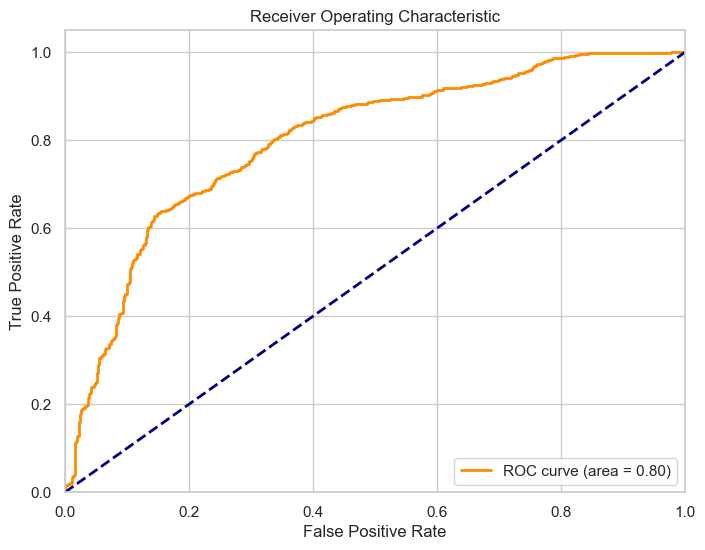

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [76]:
# Calculate the KS statistic
ks_statistic = max(tpr - fpr)
print("KS Statistic:", ks_statistic)


KS Statistic: 0.48401076302996504


In [77]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset (replace with your data)
# X should contain your feature variables, and y should contain your target variable (class labels).
# Make sure to preprocess your data as needed before using K-NN.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a K-NN classifier with a specific value of k (replace 'n_neighbors' with your desired value)
knn = KNeighborsClassifier(n_neighbors=5)  # Example with k=5

# Train the K-NN classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.6863207547169812
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.56      0.60       178
           1       0.71      0.78      0.74       246

    accuracy                           0.69       424
   macro avg       0.68      0.67      0.67       424
weighted avg       0.68      0.69      0.68       424



In [78]:
# Python code to calculate information gain and entropy. Additionally, I'll provide an example of how to compare different models based on these metrics 
# using a dataset and the scikit-learn library. Note that we won't be implementing the entire decision tree algorithm but rather using these metrics
# for feature selection and model comparison.

In [79]:
# # First, let's calculate information gain and entropy:
# import numpy as np

# def entropy(y):
#     unique, counts = np.unique(y, return_counts=True)
#     p = counts / len(y)
#     return -np.sum(p * np.log2(p))

# def information_gain(X, y, feature):
#     # Calculate the entropy of the original dataset
#     original_entropy = entropy(y)
    
#     # Calculate the weighted sum of entropies for subsets based on the feature
#     weighted_entropy = 0
#     unique_values = np.unique(X[:, feature])
    
#     for value in unique_values:
#         subset_indices = X[:, feature] == value
#         subset_entropy = entropy(y[subset_indices])
#         weight = len(y[subset_indices]) / len(y)
#         weighted_entropy += weight * subset_entropy
    
#     # Calculate information gain
#     return original_entropy - weighted_entropy


In [80]:
# # Now, let's create a simple example to compare models using information gain:
# # This code calculates information gain for each feature, selects the feature with the highest gain, and trains a decision tree using that feature. 
# # You can adapt and extend this code to compare different models by creating separate decision trees with different features or subsets of your data. 
# # The selected feature and model performance can help you make informed decisions about feature selection and model building.

# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score

# # Load the Iris dataset
# data = load_iris()
# X = data.data
# y = data.target

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Calculate information gain for each feature
# n_features = X.shape[1]
# information_gains = [information_gain(X_train, y_train, feature) for feature in range(n_features)]

# # Select the feature with the highest information gain
# selected_feature = np.argmax(information_gains)

# # Train a decision tree using the selected feature
# clf = DecisionTreeClassifier()
# clf.fit(X_train[:, [selected_feature]], y_train)
# y_pred = clf.predict(X_test[:, [selected_feature]])

# # Calculate accuracy of the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Selected Feature: {selected_feature}")
# print(f"Accuracy with the selected feature: {accuracy}")


In [81]:
# pip install xgboost

In [82]:
# # i will integrate XGBoost into my model.
# # Step 1: Import Required Libraries
import xgboost as xgb
from xgboost import XGBClassifier

# # Step 2: Split the Data
# # Since my data is already split  into training and testing sets,i will proceed with the existing X_train, X_test, y_train, and y_test.

In [83]:
# Step 3: Train the XGBoost Model
# Create an XGBoost classifier
xgb_model = XGBClassifier()

# Train the model on the training data
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [84]:
# Step 4: Make Predictions
# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

In [85]:
# Step 5: Evaluate the XGBoost Model
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("\nAccuracy:\n", accuracy_xgb)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion matrix\n",conf_matrix)
# Calculate sensitivity (recall) and specificity
true_negative, false_positive, false_negative, true_positive = conf_matrix.ravel()
sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print("\nSensitivity (Recall):\n", sensitivity)
print("\nSpecificity:\n", specificity)

# Calculate precision
precision_xgb = precision_score(y_test, y_pred_xgb)
print("\nPrecision:\n", precision_xgb)


Accuracy:
 1.0

Confusion matrix
 [[178   0]
 [  0 246]]

Sensitivity (Recall):
 1.0

Specificity:
 1.0

Precision:
 1.0


In [86]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions with XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracy, precision, and recall for the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)

print("XGBoost Model Performance:")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)


XGBoost Model Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [87]:
# # Logistic Regression (LR) with K-Fold Cross-Validation
# # Import the necessary libraries and Perform K-Fold Cross-Validation:

# import numpy as np
# from sklearn.model_selection import cross_val_score

# # Set the number of folds (K)
# k = 5  # You can choose the number of folds as needed

# # Perform K-Fold Cross-Validation for LR
# lr_scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')

# # Calculate the average accuracy and other metrics from lr_scores
# lr_avg_accuracy = np.mean(lr_scores)
# lr_avg_precision = np.mean(cross_val_score(model, X, y, cv=k, scoring='precision'))
# lr_avg_recall = np.mean(cross_val_score(model, X, y, cv=k, scoring='recall'))



In [88]:
# # XGBoost with K-Fold Cross-Validation
# # Import the necessary libraries and Perform K-Fold Cross-Validation:

# import xgboost as xgb
# from sklearn.model_selection import cross_val_score

# xgb_model = xgb.XGBClassifier()

# # Perform K-Fold Cross-Validation for XGBoost
# xgb_scores = cross_val_score(xgb_model, X_xgb, y_xgb, cv=k, scoring='accuracy')

# # Calculate the average accuracy and


In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define your logistic regression model
lr_model = LogisticRegression(max_iter=1000)

# Define the number of folds (k)
k = 5  # You can adjust this number

# Define the scoring method (e.g., 'accuracy', 'precision', 'recall', 'f1')
scoring = 'accuracy'  # You can change this to other metrics

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
results = cross_val_score(lr_model, X, y, cv=kf, scoring=scoring)

# Calculate and print the mean and standard deviation of the chosen metric
mean_score = results.mean()
std_score = results.std()
print(f'{scoring} - Mean: {mean_score:.3f}, Std: {std_score:.3f}')


accuracy - Mean: 0.749, Std: 0.010


In [91]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# Define your LR model
lr_model = LogisticRegression(max_iter=1000)

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Specify the scoring methods
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score)
}

# Perform k-fold cross-validation for each scoring method
for metric, scorer in scoring.items():
    results = cross_val_score(lr_model, X, y, cv=kf, scoring=scorer)
    mean_score = results.mean()
    std_score = results.std()
    print(f'LR - {metric} - Mean: {mean_score:.3f}, Std: {std_score:.3f}')


LR - Accuracy - Mean: 0.749, Std: 0.010
LR - Precision - Mean: 0.767, Std: 0.017
LR - Recall - Mean: 0.845, Std: 0.037
LR - F1 - Mean: 0.803, Std: 0.017


In [92]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Initialize the TF-IDF vectorizer
# tfidf_vectorizer = TfidfVectorizer()

# # Fit and transform the training text data
# X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# # Transform the test text data using the same vectorizer
# X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [94]:
# Split the data into training and testing sets (customize test_size and random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [95]:
# Define your SVM model
svm_model = SVC(kernel='linear')  # You can choose the appropriate kernel for your problem



In [96]:
# Fit the model to your training data
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [97]:
# Make predictions on the test data
y_pred = svm_model.predict(X_test)


In [98]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7570754716981132
Precision: 0.7638376383763837
Recall: 0.8414634146341463
F1 Score: 0.8007736943907157
